In [1]:
# @title Import packages
import numpy as np
import pandas as pd

import statsmodels.formula.api as sm

import matplotlib.pyplot as plt

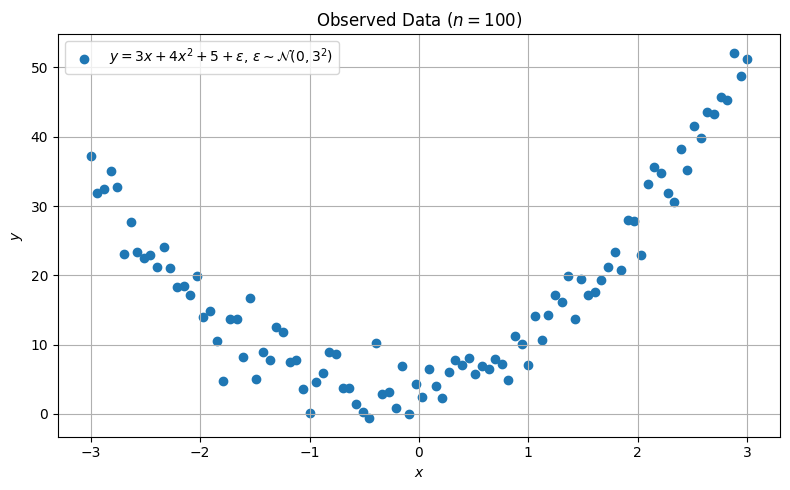

In [2]:
# @title Create the data and set observation y
np.random.seed(0)
x = np.linspace(start = -3, stop = 3, num = 100)
y = 3*x + 4*x**2 + 5 + np.random.normal(loc = 0, scale = 3, size = x.size)

plt.figure(figsize=(8, 5))
plt.scatter(x, y, label = r'$y = 3x + 4x^2 + 5 + \varepsilon$, $\varepsilon \sim \mathcal{N}(0, 3^2)$')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Observed Data ($n = 100$)')
plt.tight_layout()
plt.grid(True)
plt.legend()
plt.savefig("SimpleLinearReg_obs.svg")
plt.show()

data = pd.DataFrame({'x': x, 'y': y})
del x, y


In [3]:
# @title Linear Regression
model = sm.ols(formula = 'y ~ x + I(x**2)', data = data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     1086.
Date:                Sun, 27 Jul 2025   Prob (F-statistic):           3.91e-67
Time:                        04:37:19   Log-Likelihood:                -243.82
No. Observations:                 100   AIC:                             493.6
Df Residuals:                      97   BIC:                             501.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8583      0.422      9.141      0.0

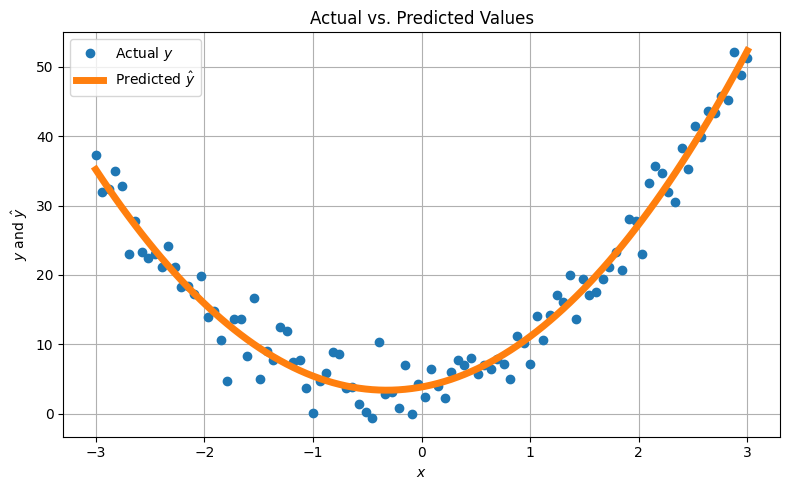

In [4]:
# @title Prediction plot

# Add predicted values to the dataframe
data['y_hat'] = model.fittedvalues

# Sort data for a smooth plot
data_sorted = data.sort_values(by='x')

# Plot actual vs predicted
plt.figure(figsize=(8, 5))
plt.plot(data_sorted['x'], data_sorted['y'], 'o', label='Actual $y$')
plt.plot(data_sorted['x'], data_sorted['y_hat'], '-', label='Predicted $\hat{y}$', linewidth=5)

plt.xlabel('$x$')
plt.ylabel('$y$ and $\hat{y}$')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("SimpleLinearReg_Pred.svg")
plt.show()